In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [3]:
# import sys
# sys.path.append('/opt/ml/final_project/ultralytics')
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

In [122]:
not tuple()

True

In [4]:
import os
os.environ['WANDB_DISABLED'] = 'true'

In [5]:
model.train(data="/opt/ml/final_project/data_gray/data.yaml", cfg="./piano_config.yaml")

New https://pypi.org/project/ultralytics/8.0.136 available 😃 Update with 'pip install -U ultralytics'
cfg file passed. Overriding default params with ./piano_config.yaml.
Ultralytics YOLOv8.0.132 🚀 Python-3.8.5 torch-2.0.1+cu117 CUDA:0 (Tesla V100-PCIE-32GB, 32510MiB)


yolo/engine/trainer: task=detect, mode=train, model=None, data=/opt/ml/final_project/data_gray/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=pmt, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nms=False, lr0=0.01, lrf=0.01, m

AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /opt/ml/final_project/data_gray/train/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 888.65it/s]
train: New cache created: /opt/ml/final_project/data_gray/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /opt/ml/final_project/data_gray/valid/labels... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<00:00, 3955.02it/s]
val: New cache created: /opt/ml/final_project/data_gray/valid/labels.cache
Plotting labels to pmt/train3/labels.jpg... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to pmt/train3
Starting training for 100 epochs...


In [6]:
results = model.predict(source="/opt/ml/final_project/data/valid/images", device='0')


image 1/32 /opt/ml/final_project/data/valid/images/105_jpg.rf.ae442a46004bc5899e6c05f0c0c9da29.jpg: 384x640 2 pianos, 54.9ms
image 2/32 /opt/ml/final_project/data/valid/images/108_jpg.rf.0907023fb3e79041178f62ebb570c8fb.jpg: 384x640 1 piano, 8.0ms
image 3/32 /opt/ml/final_project/data/valid/images/111_jpg.rf.10a1f4c7f22209a84011fc2afbc5d05a.jpg: 384x640 1 piano, 8.3ms
image 4/32 /opt/ml/final_project/data/valid/images/12_jpg.rf.94178fdd5936faf9095cbd49de9e0236.jpg: 384x640 2 pianos, 7.9ms
image 5/32 /opt/ml/final_project/data/valid/images/15_jpg.rf.590ad5930895ee5c7acd287c2bd56ac0.jpg: 384x640 2 pianos, 7.8ms
image 6/32 /opt/ml/final_project/data/valid/images/21_jpg.rf.2b4878bd4fe1d192da906c5111b05dde.jpg: 384x640 1 piano, 8.3ms
image 7/32 /opt/ml/final_project/data/valid/images/22_jpg.rf.fca015289279e28dca321bb27ecaa037.jpg: 384x640 1 piano, 7.9ms
image 8/32 /opt/ml/final_project/data/valid/images/26_jpg.rf.6d576de1dd0b0101269efcd595dff7a4.jpg: 384x640 1 piano, 7.4ms
image 9/32 /opt/

In [24]:
tuple(np.array(results[0].boxes.xyxy.detach().cpu()[0], dtype=int))

(37, 535, 1906, 796)

In [10]:
idx = 25
original = results[idx].orig_img
original_copy = original.copy()
xyxy = tuple(np.array(results[idx].boxes.xyxy.detach().cpu()[0], dtype=int))
cropped = original_copy[xyxy[1]:xyxy[3], xyxy[0]:xyxy[2], ...].copy()
cropped_resize = cv2.resize(cropped, dsize=(900, 100), interpolation=cv2.INTER_AREA)
cv2.rectangle(original_copy, xyxy[:2], xyxy[2:],  (0, 255, 0), 10)
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
axes[0, 0].imshow(original)
axes[0, 1].imshow(original_copy)
axes[1, 0].imshow(cropped)
axes[1, 1].imshow(cropped_resize)

In [9]:
results[0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[5.8905e-01, 5.3197e+02, 1.9196e+03, 7.9505e+02, 9.6995e-01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.9115e+03, 3.8130e+02, 5.3876e-01, 0.0000e+00]], device='cuda:0')
cls: tensor([0., 0.], device='cuda:0')
conf: tensor([0.9699, 0.5388], device='cuda:0')
data: tensor([[5.8905e-01, 5.3197e+02, 1.9196e+03, 7.9505e+02, 9.6995e-01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.9115e+03, 3.8130e+02, 5.3876e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 1920)
shape: torch.Size([2, 6])
xywh: tensor([[ 960.1000,  663.5073, 1919.0217,  263.0793],
        [ 955.7360,  190.6523, 1911.4719,  381.3045]], device='cuda:0')
xywhn: tensor([[0.5001, 0.6144, 0.9995, 0.2436],
        [0.4978, 0.1765, 0.9956, 0.3531]], device='cuda:0')
xyxy: tensor([[5.8905e-01, 5.3197e+02, 1.9196e+03, 7.9505e+02],
        [0.0000e+00, 0.0000e+00, 1.9115e+03, 3.8130e+02]], device='cuda:0')
xyxyn: tensor([[

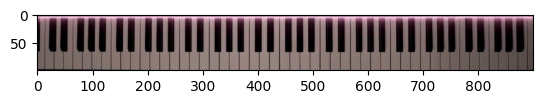

In [47]:
plt.imshow(cv2.resize(cropped, dsize=(900, 100), interpolation=cv2.INTER_AREA))

In [11]:
cap = cv2.VideoCapture("/opt/ml/ytdataset/videos/train/100_Paul Rice “Waltz for Ella” FREE SHEET MUSIC P Barton FEURICH piano.mp4")
for i in range(1000):
    _, frame = cap.read()
result = model.predict(source=frame, device="0")
original = result[0].orig_img[..., ::-1]
original_copy = original.copy()
xyxy = tuple(np.array(result[0].boxes.xyxy.detach().cpu()[0], dtype=int))
cropped = original_copy[xyxy[1]:xyxy[3]+150, xyxy[0]:xyxy[2], ...].copy()
cropped_resize = cv2.resize(cropped, dsize=(900, 100), interpolation=cv2.INTER_AREA)
cv2.rectangle(original_copy, xyxy[:2], xyxy[2:],  (0, 255, 0), 10)
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
axes[0, 0].imshow(original)
axes[0, 1].imshow(original_copy)
axes[1, 0].imshow(cropped)
axes[1, 1].imshow(cropped_resize)


0: 384x640 1 piano, 20.5ms
Speed: 6.2ms preprocess, 20.5ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


In [12]:
xyxy

(31, 659, 1875, 864)

In [3]:
# from list of PIL/ndarray
im1 = cv2.imread("/opt/ml/final_project/data/valid/images/105_jpg.rf.ae442a46004bc5899e6c05f0c0c9da29.jpg")
result = model.predict(source=im1, device="0")


0: 384x640 1 piano, 157.2ms
Speed: 18.3ms preprocess, 157.2ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)


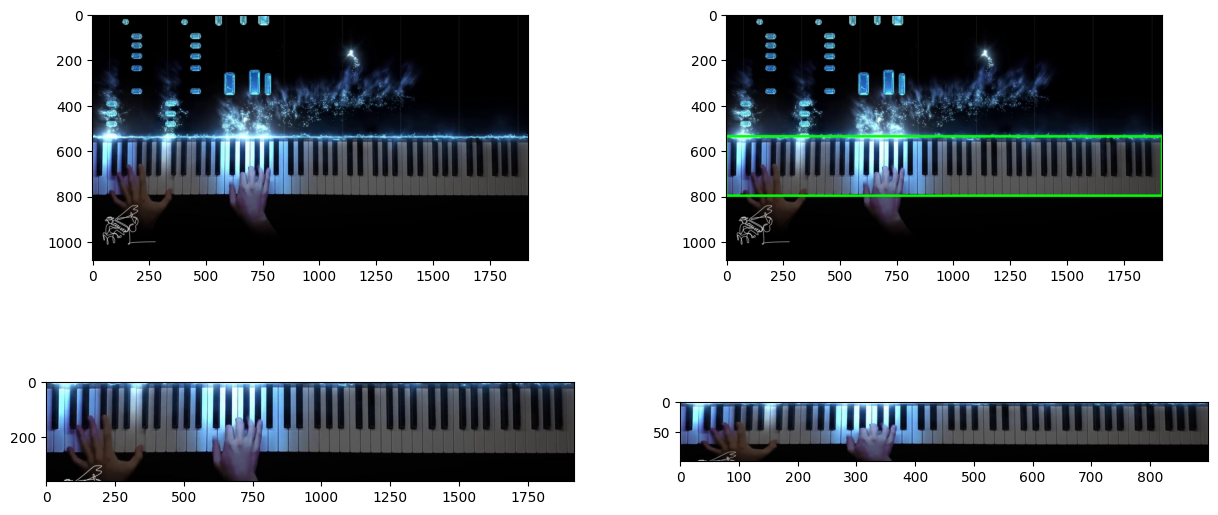

In [8]:
original = result[0].orig_img[..., ::-1]
original_copy = original.copy()
xyxy = tuple(np.array(result[0].boxes.xyxy.detach().cpu()[0], dtype=int))
cropped = original_copy[xyxy[1]:xyxy[3]+100, xyxy[0]:xyxy[2], ...].copy()
cropped_resize = cv2.resize(cropped, dsize=(900, 100), interpolation=cv2.INTER_AREA)
cv2.rectangle(original_copy, xyxy[:2], xyxy[2:],  (0, 255, 0), 10)
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
axes[0, 0].imshow(original)
axes[0, 1].imshow(original_copy)
axes[1, 0].imshow(cropped)
axes[1, 1].imshow(cropped_resize)

In [94]:
result[0].boxes.conf.item()

0.9600042104721069

In [110]:
cap = cv2.VideoCapture("/opt/ml/final_project/test_video/Brahms - Hungarian Dance No5.mp4")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('./test_video/Brahms - Hungarian Dance No5-out2.mp4', fourcc, fps, (900, 100))

In [111]:
xyxy = None
while True:
    ret, frame = cap.read()
    if not ret:
        break
    if not xyxy:
        output = model.predict(source=frame, device="0")
        if output:
            if output[0].boxes.conf.item() > 0.9:
                xyxy = tuple(np.array(output[0].boxes.xyxy.detach().cpu()[0], dtype=int))
    
    if xyxy:
        cropped = frame[xyxy[1]:xyxy[3], xyxy[0]:xyxy[2], ...].copy()
        cropped_resize = cv2.resize(cropped, dsize=(900, 100), interpolation=cv2.INTER_AREA)    
        out.write(cropped_resize)
    cv2.waitKey(1)
cap.release()
out.release()    


0: 544x960 1 piano, 19.7ms
Speed: 9.7ms preprocess, 19.7ms inference, 3.9ms postprocess per image at shape (1, 3, 544, 960)


KeyboardInterrupt: 

In [112]:
cap.release()
out.release()

In [144]:
# Export the model
model.export(format='onnx', imgsz=(384, 640))

Ultralytics YOLOv8.0.128 🚀 Python-3.8.5 torch-2.0.1+cu117 CUDA:0 (Tesla V100-PCIE-32GB, 32510MiB)

PyTorch: starting from pmt/train/weights/best.pt with input shape (1, 3, 384, 640) BCHW and output shape(s) (1, 5, 5040) (5.9 MB)
requirements: Ultralytics requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 162.0 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 7.9s, saved as pmt/train/weights/best.onnx (11.6 MB)

Export complete (8.0s)
Results saved to /opt/ml/final_project/pmt/train/weights
Predict:         yolo predict task=detect model=pmt/train/weights/best.onnx imgsz=384,640 
Validate:        yolo val task=detect model=pmt/train/weights/best.onnx imgsz=384,640 data=/opt/ml/final_project/data/data.yaml WARNING ⚠️ non-PyTorch val requires squar

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'pmt/train/weights/best.onnx'